In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rijul\anaconda3\envs\opencv_

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 829s 5us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[9]

'truck'

In [10]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])   # change values bring different images
    plt.xlabel(classes[])

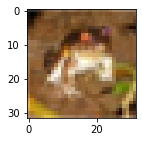

In [17]:
plot_sample(X_train, y_train, 0)

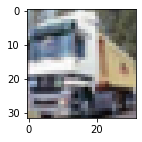

In [18]:
plot_sample(X_train, y_train, 1)

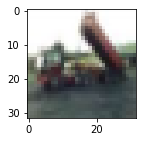

In [19]:
plot_sample(X_train, y_train, 2)

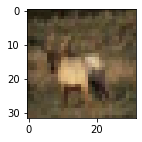

In [20]:
plot_sample(X_train, y_train, 3)

In [23]:
X_train = X_train / 255  #X_train[0]/255
X_test = X_test / 255

In [25]:
cnn = models.Sequential([
    
        #cnn
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
    
    
        # dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.5266 - acc: 0.4510
Epoch 2/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.1850 - acc: 0.5835
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.0690 - acc: 0.6257
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.9897 - acc: 0.6540
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9310 - acc: 0.6738
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8815 - acc: 0.6913
Epoch 7/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8412 - acc: 0.7057
Epoch 8/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8007 - acc: 0.7191
Epoch 9/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.7709 - acc: 0.7296
Epoch 10/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 

In [29]:
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 587us/sample - loss: 0.9205 - acc: 0.6854


[0.920525005197525, 0.6854]

In [30]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6])

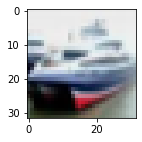

In [31]:
plot_sample(X_test, y_test, 1)

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.3622877e-02, 4.5963234e-04, 2.0690558e-02, 7.0648497e-01,
        8.1212344e-03, 5.3872343e-02, 1.3800147e-02, 2.1323082e-03,
        1.2850904e-01, 2.3069992e-03],
       [2.4073536e-03, 4.6395814e-01, 6.2458553e-06, 7.6660916e-07,
        1.1262141e-06, 2.1707368e-08, 1.6245862e-07, 7.7295894e-08,
        5.1082534e-01, 2.2800798e-02],
       [2.1408727e-02, 4.7758285e-02, 6.7419340e-03, 1.0900925e-03,
        6.2057213e-03, 1.8859938e-04, 3.1287028e-04, 7.5694622e-04,
        8.4258920e-01, 7.2947733e-02],
       [6.9806933e-01, 1.4989995e-02, 5.5941146e-02, 1.1542538e-03,
        3.1168461e-02, 2.3225488e-05, 3.0934435e-04, 1.6726083e-04,
        1.9630870e-01, 1.8683147e-03],
       [2.7031815e-06, 8.6700478e-05, 4.2285924e-03, 1.1996928e-02,
        3.4217432e-01, 9.2421781e-04, 6.4021975e-01, 1.1139257e-05,
        3.5424027e-04, 1.3932952e-06]], dtype=float32)

In [33]:
np.argmax([5,12,1,2])

1

In [34]:
np.argmax([5,12,167,2])

2

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6])

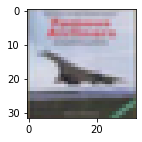

In [48]:
plot_sample(X_test, y_test, 3)

In [49]:
classes[y_classes[3]]

'airplane'